# **Import the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/loan_data.csv')

In [ ]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
data.shape

(9578, 14)

In [ ]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# **Data Preprocessing**

In [ ]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [ ]:
data['pub.rec'].value_counts()

0    9019
1     533
2      19
3       5
4       1
5       1
Name: pub.rec, dtype: int64

# **Build models to assess the credit risk of borrowers and predict the likelihood of loan default.**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
x = data.drop(['not.fully.paid','purpose'], axis=1)
y = data['not.fully.paid']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
acc = model.score(x_test,y_test)
acc

0.8392484342379958

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1602,   13],
       [ 295,    6]])

In [ ]:
class_rep = classification_report(y_test, y_pred)
class_rep

'              precision    recall  f1-score   support\n\n           0       0.84      0.99      0.91      1615\n           1       0.32      0.02      0.04       301\n\n    accuracy                           0.84      1916\n   macro avg       0.58      0.51      0.47      1916\nweighted avg       0.76      0.84      0.77      1916\n'

Here we are creating and training a RandomForestClassifier model using the scikit-learn library in Python to predict the data and the accuracy of the predicted data.

# **Analyze the impact of different factors on loan approval or rejection.**


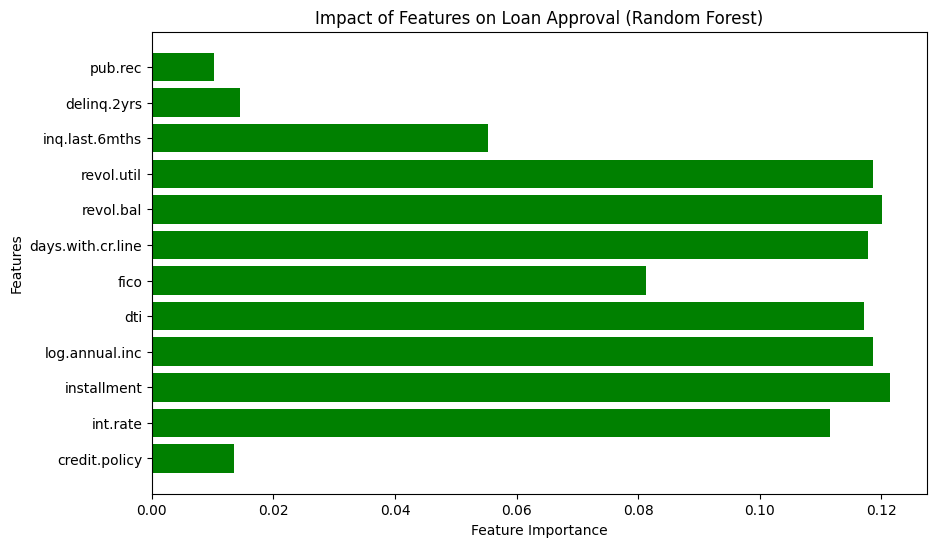

In [ ]:
X = data.drop(['not.fully.paid','purpose'], axis=1)
y = data['not.fully.paid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance scores from the trained model
feature_names = X.columns
feature_importance = model.feature_importances_

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='green')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Impact of Features on Loan Approval (Random Forest)')
plt.show()

The above visualization tells how different factors affecting the Loan approval and their importance in approval or rejection in it .

# **Study how different factors influence the interest rate assigned to borrowers.**

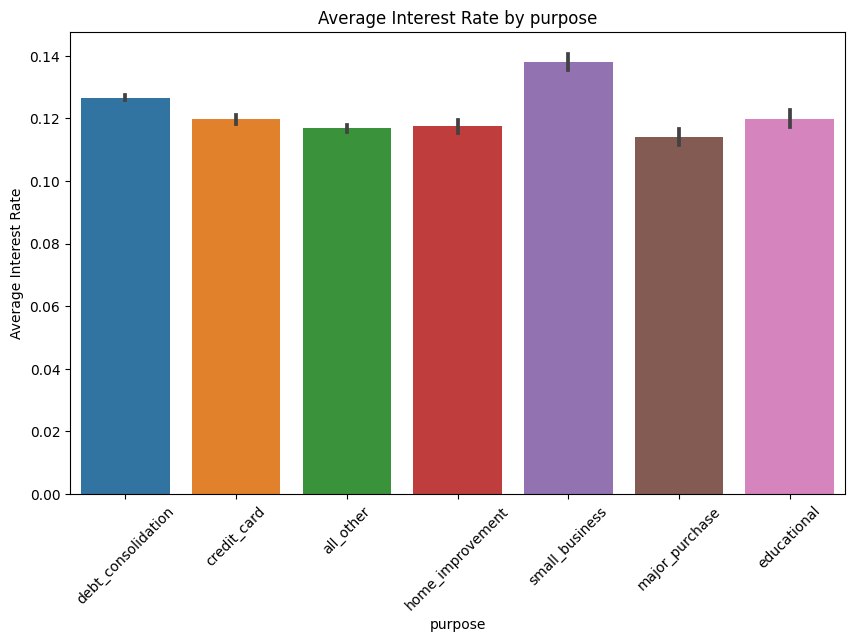

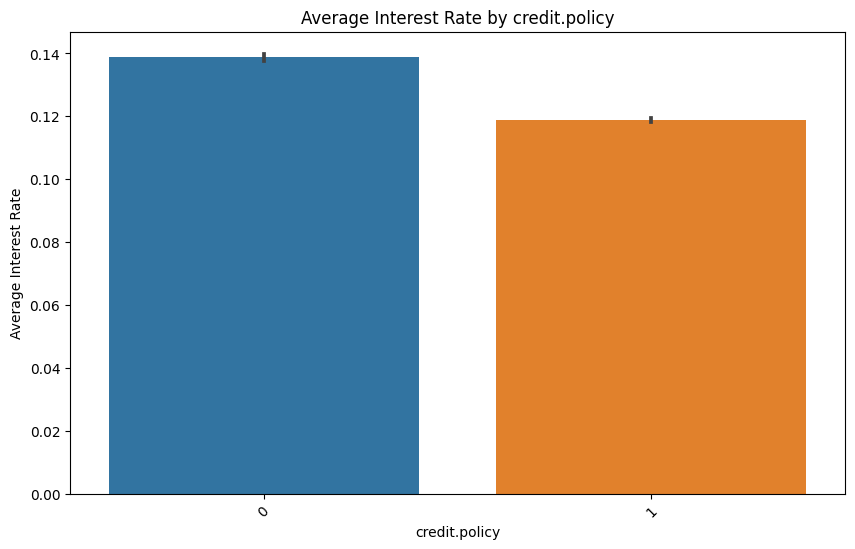

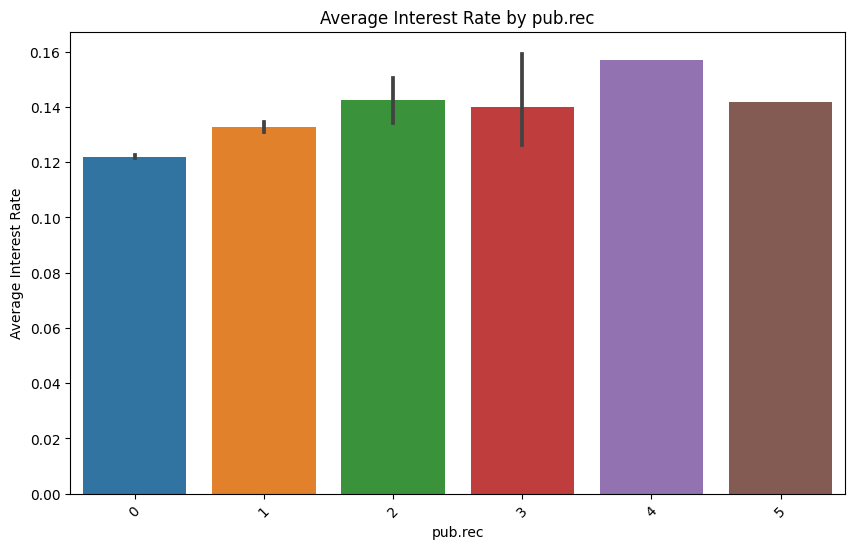

In [ ]:
# Create bar plots to visualize the average interest rate based on categorical features
categorical_features = ['purpose', 'credit.policy',  'pub.rec']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='int.rate', data=data)
    plt.title(f'Average Interest Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average Interest Rate')
    plt.xticks(rotation=45)
    plt.show()

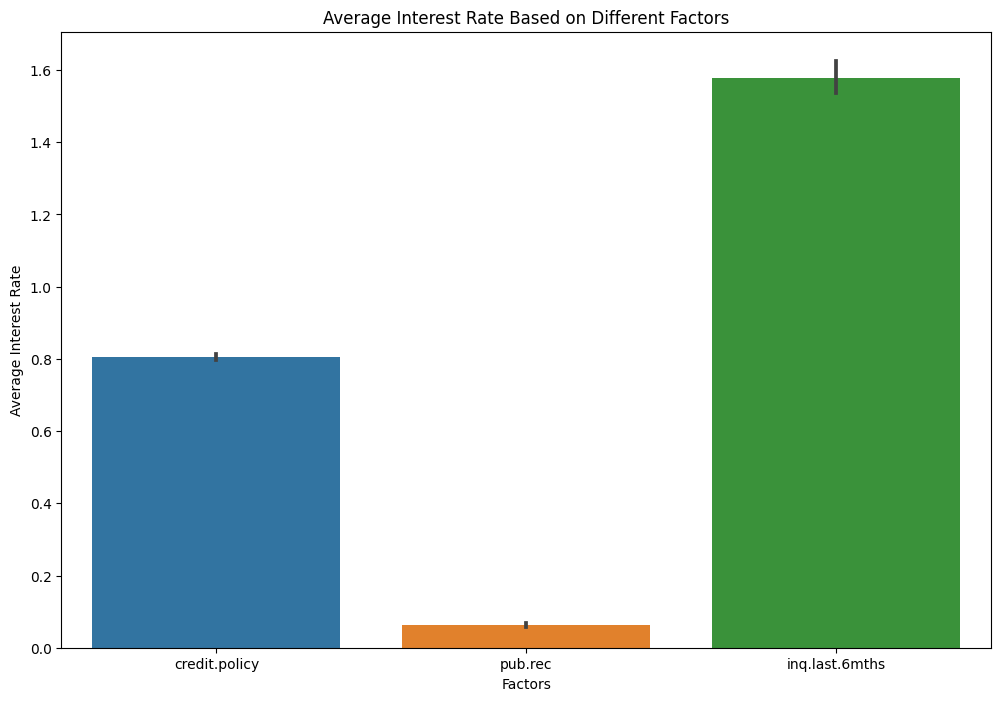

In [ ]:
categorical_features = ['purpose', 'credit.policy',  'pub.rec','inq.last.6mths',]
plt.figure(figsize=(12, 8))
sns.barplot(data=data[categorical_features ])
plt.xlabel('Factors')
plt.ylabel('Average Interest Rate')
plt.title('Average Interest Rate Based on Different Factors')
plt.show()

The above visualization shows how different factors influence the interest rate assigned to borrowers.

# **Explore the effect of loan purpose on creditworthiness and repayment behavior.**


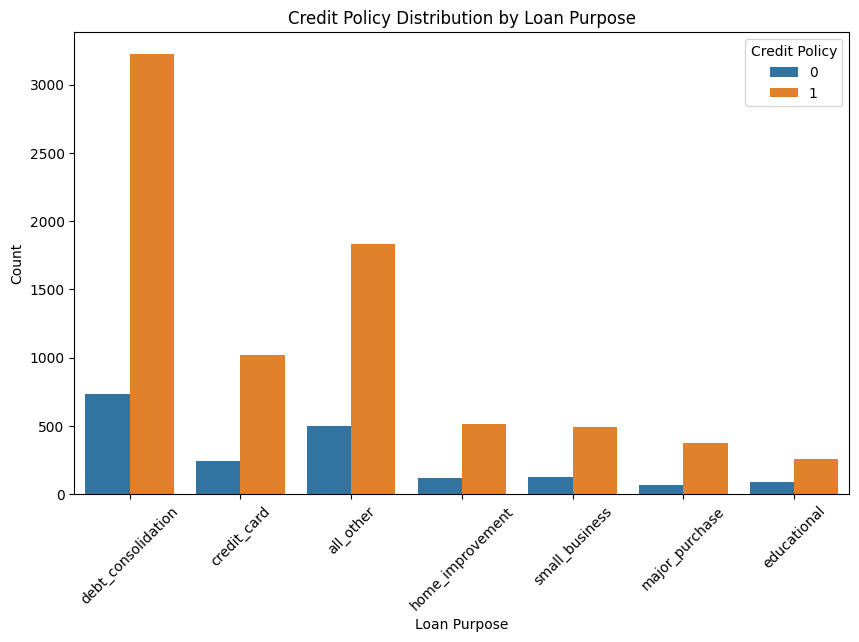

In [ ]:
# Explore credit policy and loan purpose
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='purpose', hue='credit.policy')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Credit Policy Distribution by Loan Purpose')
plt.xticks(rotation=45)
plt.legend(title='Credit Policy')
plt.show()



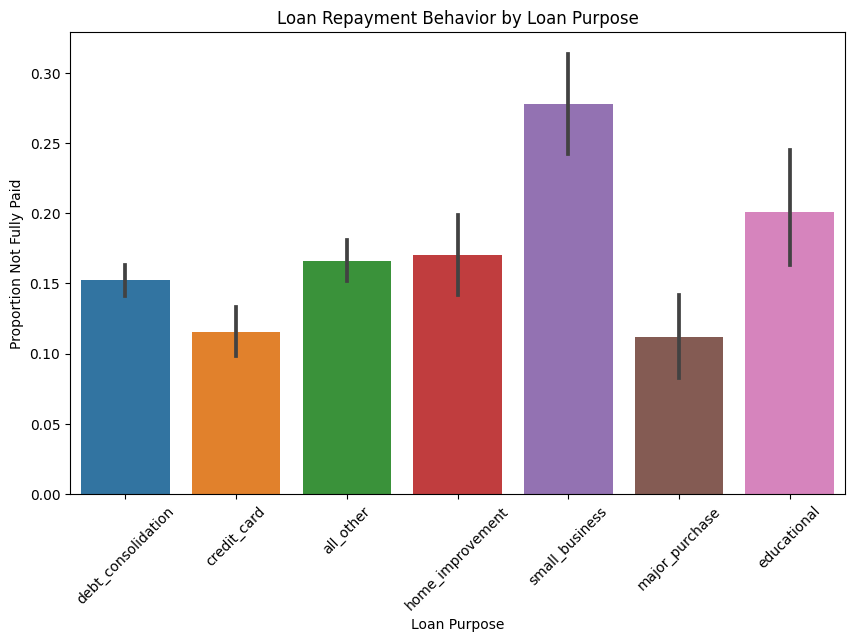

In [ ]:
# Explore loan repayment behavior and loan purpose
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='purpose', y='not.fully.paid')
plt.xlabel('Loan Purpose')
plt.ylabel('Proportion Not Fully Paid')
plt.title('Loan Repayment Behavior by Loan Purpose')
plt.xticks(rotation=45)
plt.show()

The above visualization shows us the effect of loan purpose on creditworthiness and repayment behavior and their importance in it.

# **Analyze how the debt-to-income ratio affects loan repayment.**

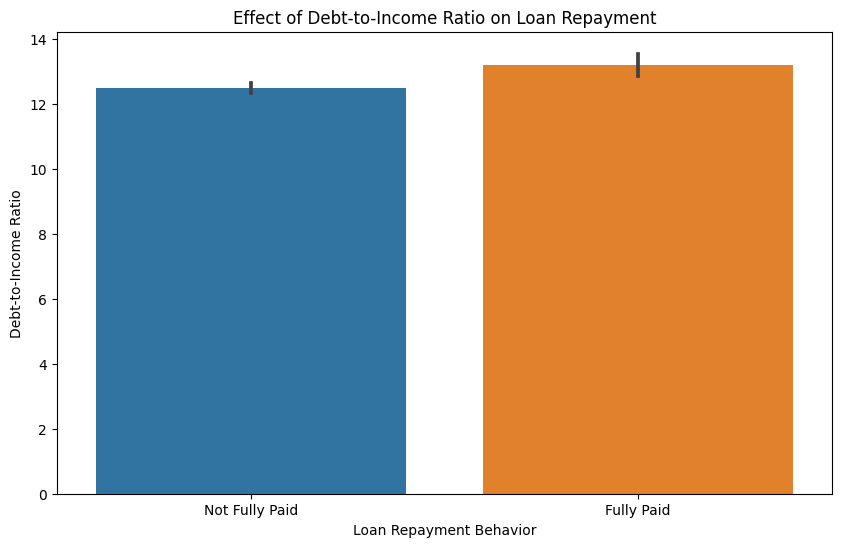

In [ ]:
# Explore loan repayment behavior based on the debt-to-income ratio
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='not.fully.paid', y='dti')
plt.xlabel('Loan Repayment Behavior')
plt.ylabel('Debt-to-Income Ratio')
plt.title('Effect of Debt-to-Income Ratio on Loan Repayment')
plt.xticks([1, 0], ['Fully Paid', 'Not Fully Paid'])
plt.show()

The above visualization shows us how the debt-to-income ratio affects loan repayment and its importance in loan repayment.

# **Study the relationship between credit scores (FICO) and loan outcomes.**


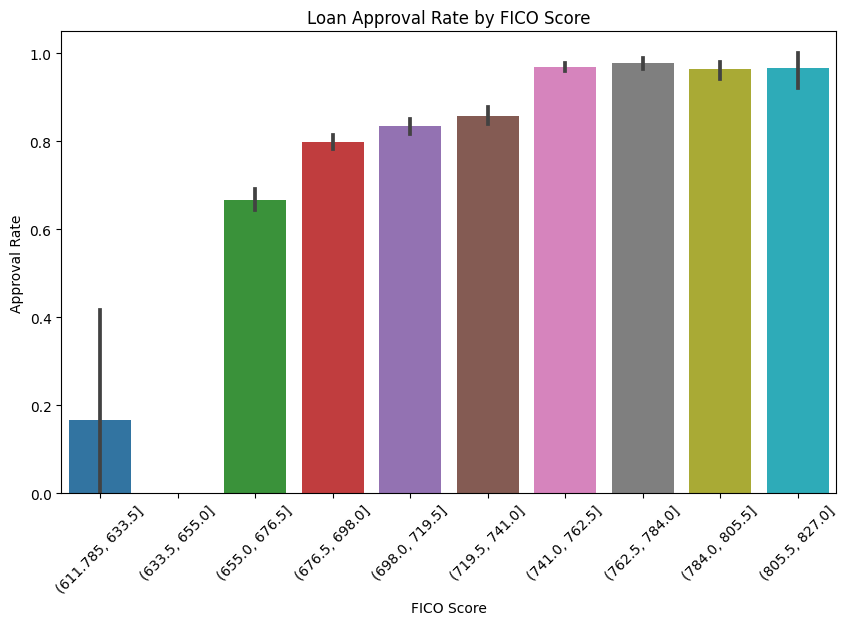

In [ ]:
# Explore loan approval rates based on FICO scores
plt.figure(figsize=(10, 6))
fico_ranges = pd.cut(data['fico'], bins=10)
sns.barplot(data=data, x=fico_ranges, y='credit.policy')
plt.xlabel('FICO Score')
plt.ylabel('Approval Rate')
plt.title('Loan Approval Rate by FICO Score')
plt.xticks(rotation=45)
plt.show()



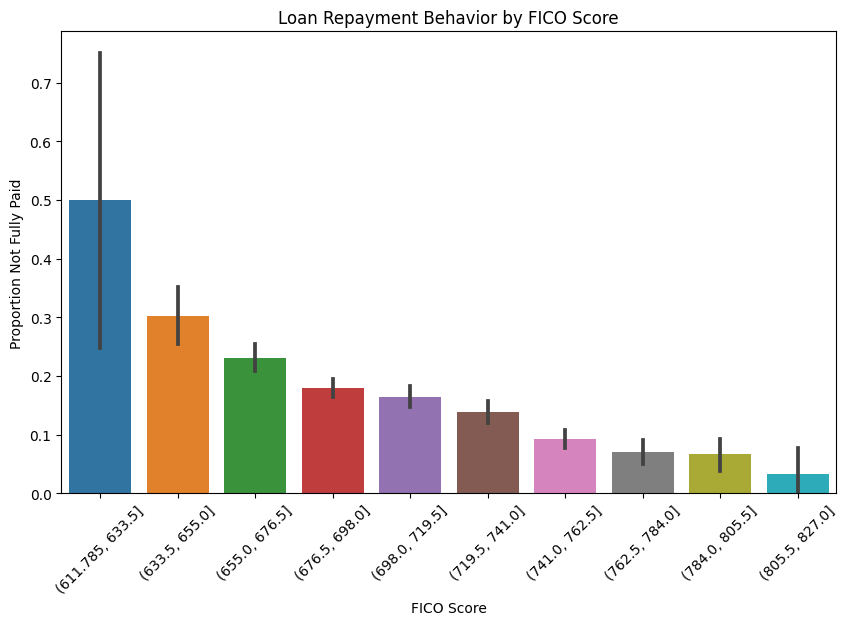

In [ ]:
# Explore loan repayment behavior based on FICO scores
plt.figure(figsize=(10, 6))
fico_ranges = pd.cut(data['fico'], bins=10)
sns.barplot(data=data, x=fico_ranges, y='not.fully.paid')
plt.xlabel('FICO Score')
plt.ylabel('Proportion Not Fully Paid')
plt.title('Loan Repayment Behavior by FICO Score')
plt.xticks(rotation=45)
plt.show()



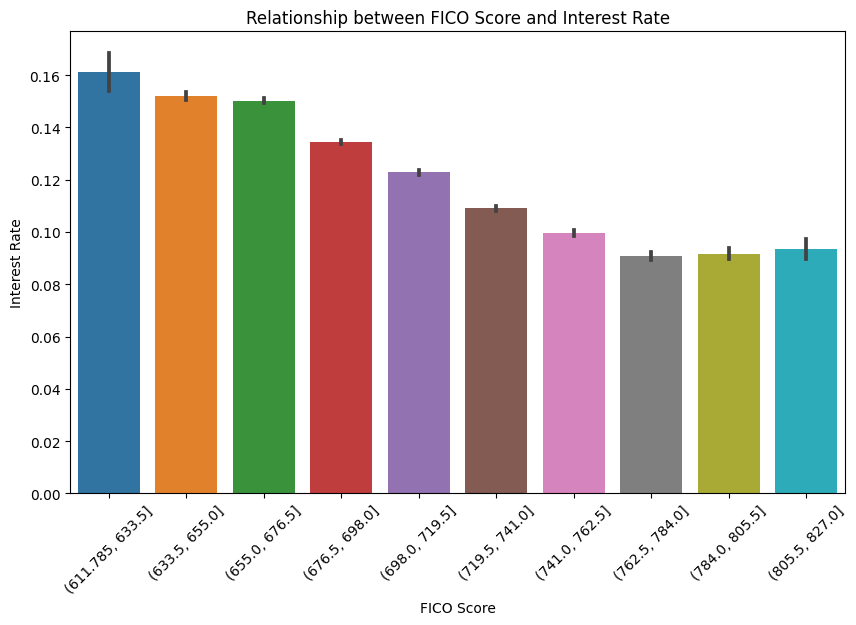

In [ ]:
# Explore relationship between FICO scores and interest rates
plt.figure(figsize=(10, 6))
fico_ranges = pd.cut(data['fico'], bins=10)
sns.barplot(data=data, x=fico_ranges, y='int.rate')
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.title('Relationship between FICO Score and Interest Rate')
plt.xticks(rotation=45)
plt.show()

The above visualization shows the relationship between credit scores (FICO) and loan outcomes such as approval rates , intrest rates ...

# **Analyze how revolving utilization rates impact creditworthiness.**


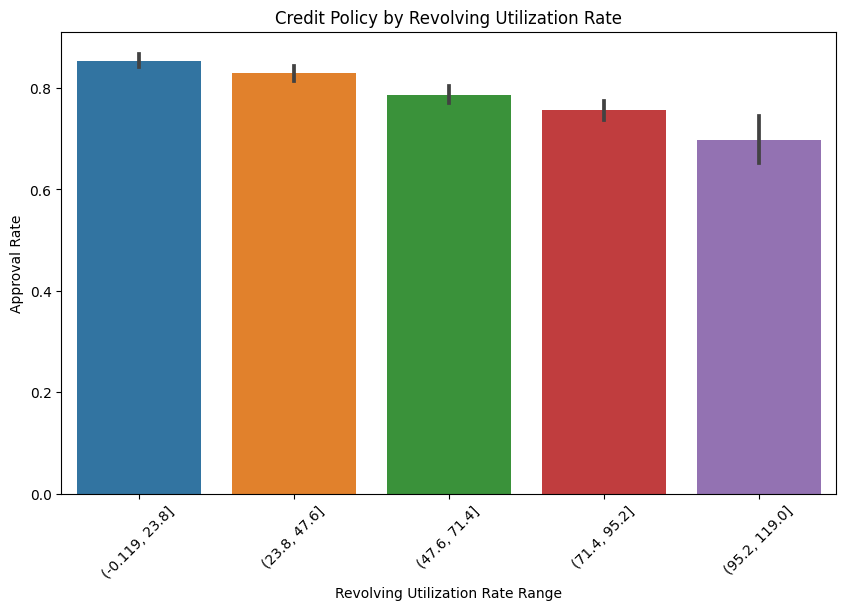

In [ ]:
plt.figure(figsize=(10, 6))
utilization_ranges = pd.cut(data['revol.util'], bins=5)
sns.barplot(data=data, x=utilization_ranges, y='credit.policy')
plt.xlabel('Revolving Utilization Rate Range')
plt.ylabel('Approval Rate')
plt.title('Credit Policy by Revolving Utilization Rate')
plt.xticks(rotation=45)
plt.show()

# **Study the impact of recent credit inquiries on loan approval and interest rates.**


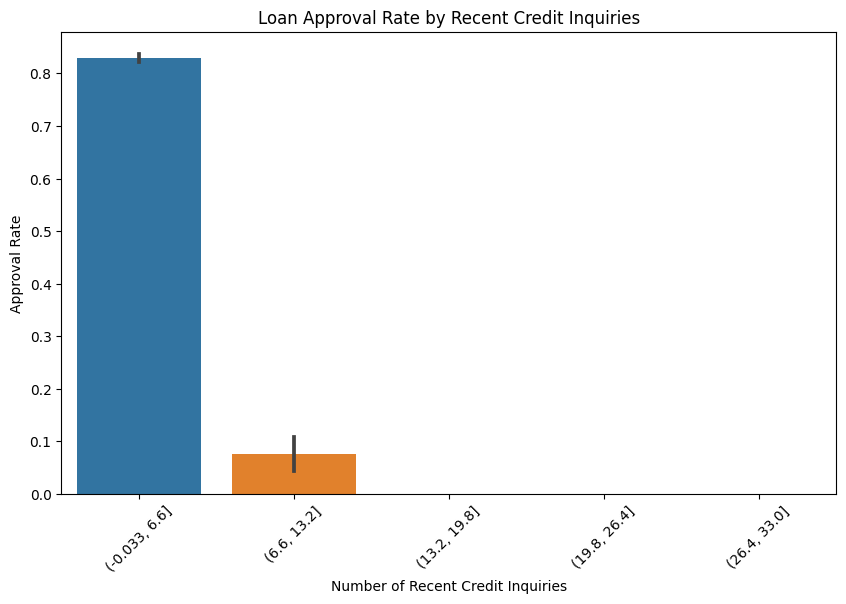

In [ ]:
# Explore loan approval rates based on recent credit inquiries
plt.figure(figsize=(10, 6))
inquiries_ranges = pd.cut(data['inq.last.6mths'], bins=5)
sns.barplot(data=data, x=inquiries_ranges, y='credit.policy')
plt.xlabel('Number of Recent Credit Inquiries')
plt.ylabel('Approval Rate')
plt.title('Loan Approval Rate by Recent Credit Inquiries')
plt.xticks(rotation=45)
plt.show()


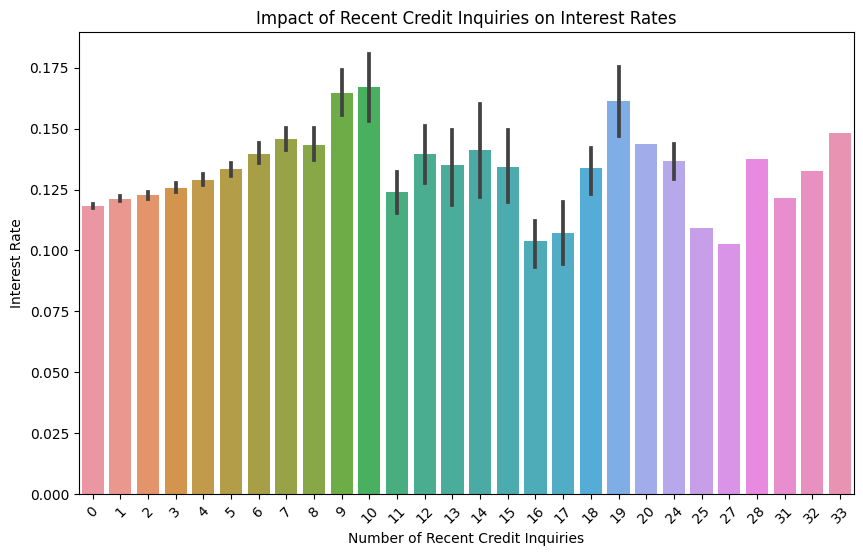

In [ ]:
# Explore relationship between recent credit inquiries and interest rates
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='inq.last.6mths', y='int.rate')
plt.xlabel('Number of Recent Credit Inquiries')
plt.ylabel('Interest Rate')
plt.title('Impact of Recent Credit Inquiries on Interest Rates')
plt.xticks(rotation=45)
plt.show()

The above visualization shows the impact of recent credit inquiries on loan approval and interest rates.

# **Analyze the correlation between past delinquencies and loan default**.


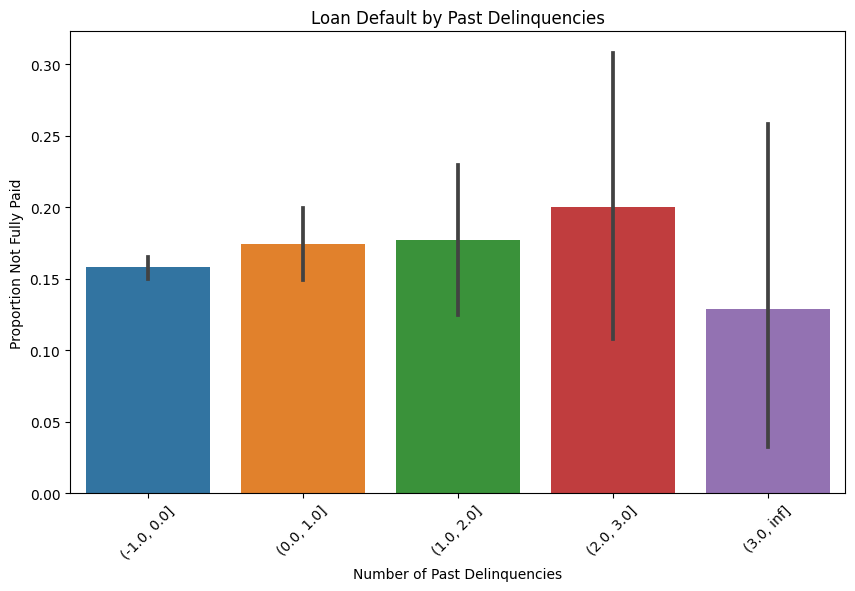

In [ ]:
plt.figure(figsize=(10, 6))
delinquencies_ranges = pd.cut(data['delinq.2yrs'], bins=[-1, 0, 1, 2, 3, float('inf')])
sns.barplot(data=data, x=delinquencies_ranges, y='not.fully.paid')
plt.xlabel('Number of Past Delinquencies')
plt.ylabel('Proportion Not Fully Paid')
plt.title('Loan Default by Past Delinquencies')
plt.xticks(rotation=45)
plt.show()

# **Explore how the presence of derogatory public records affects loan outcomes.**


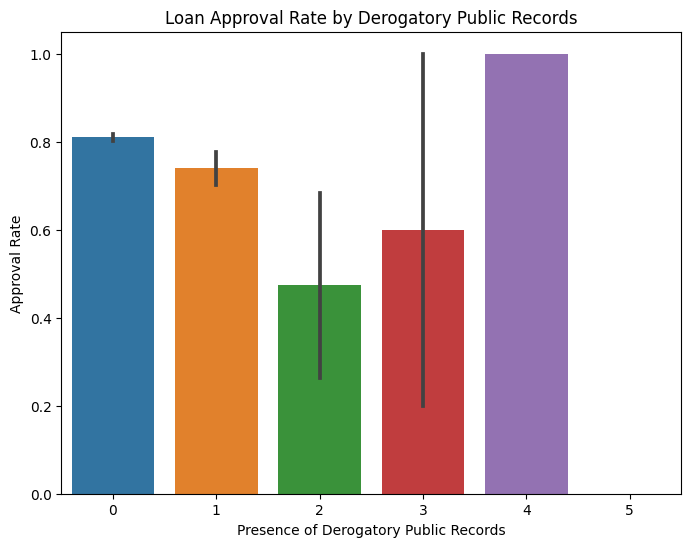

In [ ]:
# Explore loan approval rates based on derogatory public records
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='pub.rec', y='credit.policy')
plt.xlabel('Presence of Derogatory Public Records')
plt.ylabel('Approval Rate')
plt.title('Loan Approval Rate by Derogatory Public Records')
plt.show()


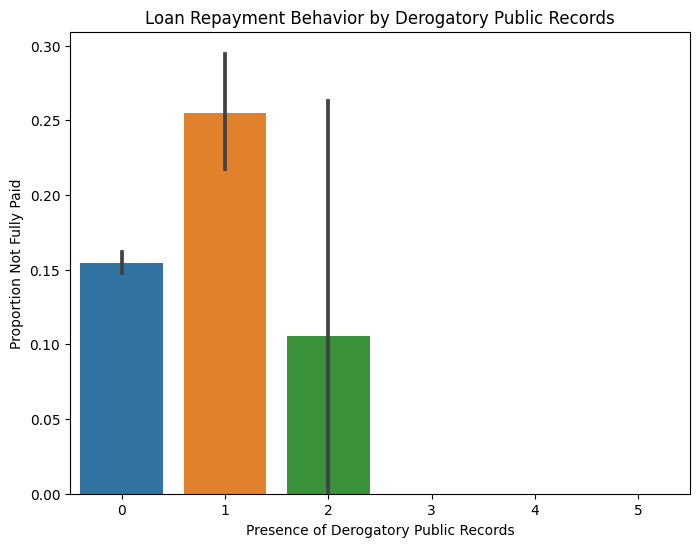

In [ ]:
# Explore loan repayment behavior based on derogatory public records
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='pub.rec', y='not.fully.paid')
plt.xlabel('Presence of Derogatory Public Records')
plt.ylabel('Proportion Not Fully Paid')
plt.title('Loan Repayment Behavior by Derogatory Public Records')

plt.show()

# **Segment borrowers based on their credit profiles and analyze different segments' behavior.**


In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


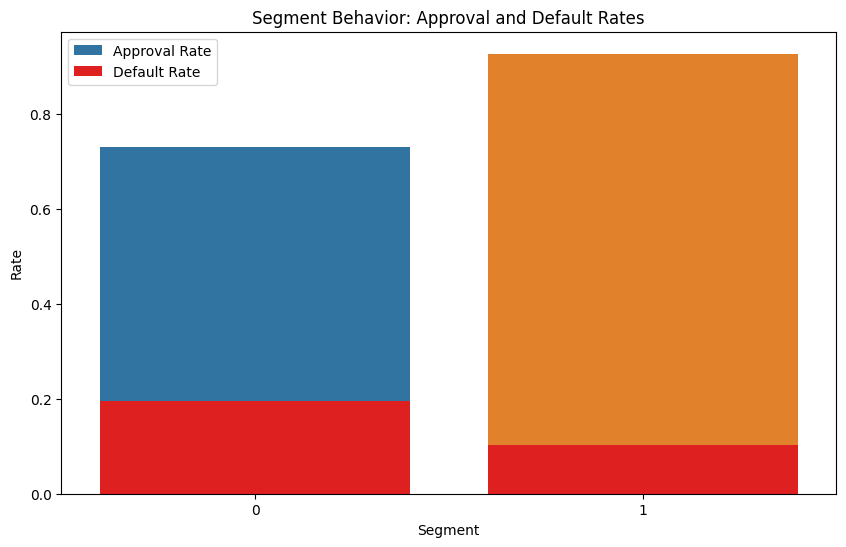

In [ ]:
# Select features for segmentation
segmentation_features = ['fico', 'dti']

# Perform K-Means clustering for segmentation
n_clusters = 2  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['segment'] = kmeans.fit_predict(data[segmentation_features])

# Analyze segment behavior
segment_summary = data.groupby('segment').agg({
    'credit.policy': 'mean',
    'not.fully.paid': 'mean',
    'int.rate': 'mean'
}).reset_index()

# Visualize segment behavior
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_summary, x='segment', y='credit.policy', label='Approval Rate')
sns.barplot(data=segment_summary, x='segment', y='not.fully.paid', label='Default Rate',color='r')
plt.xlabel('Segment')
plt.ylabel('Rate')
plt.title('Segment Behavior: Approval and Default Rates')
plt.legend()
plt.show()

# **Use data visualization to understand loan characteristics and their impact on creditworthiness.**


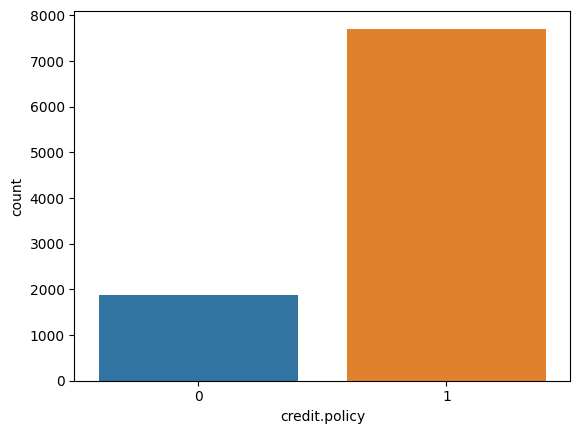

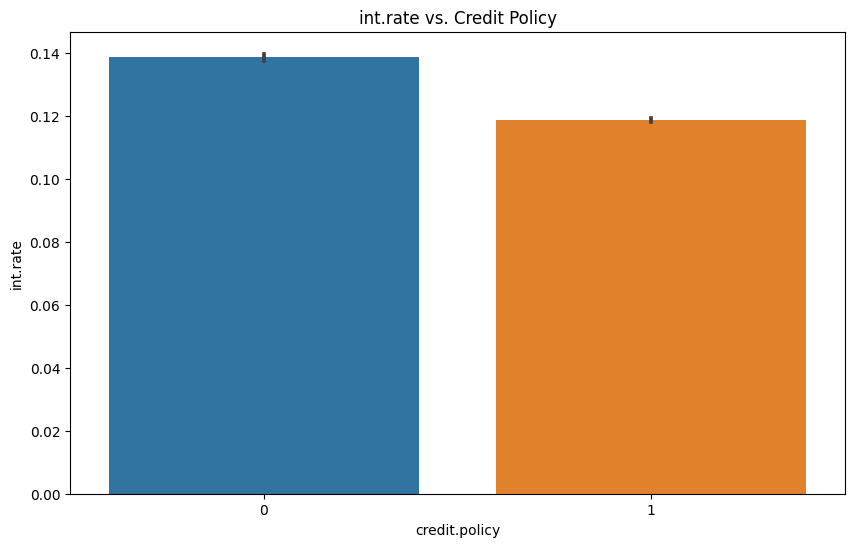

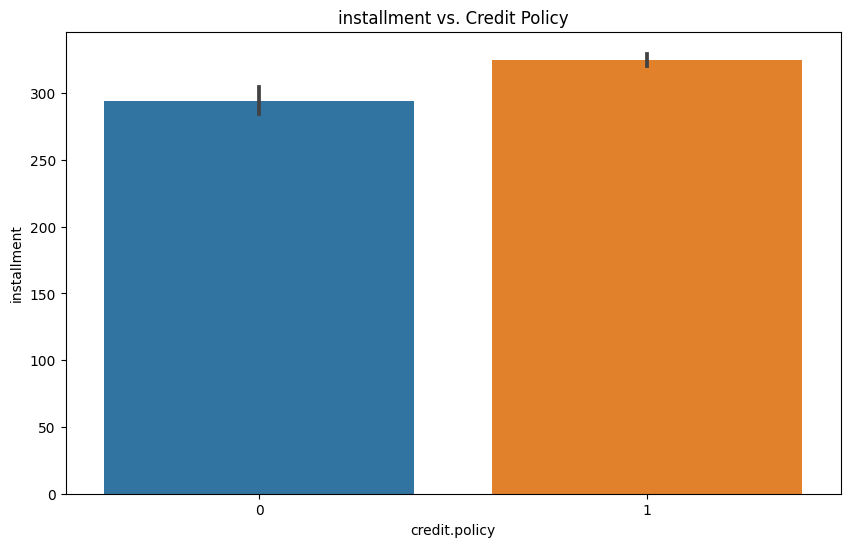

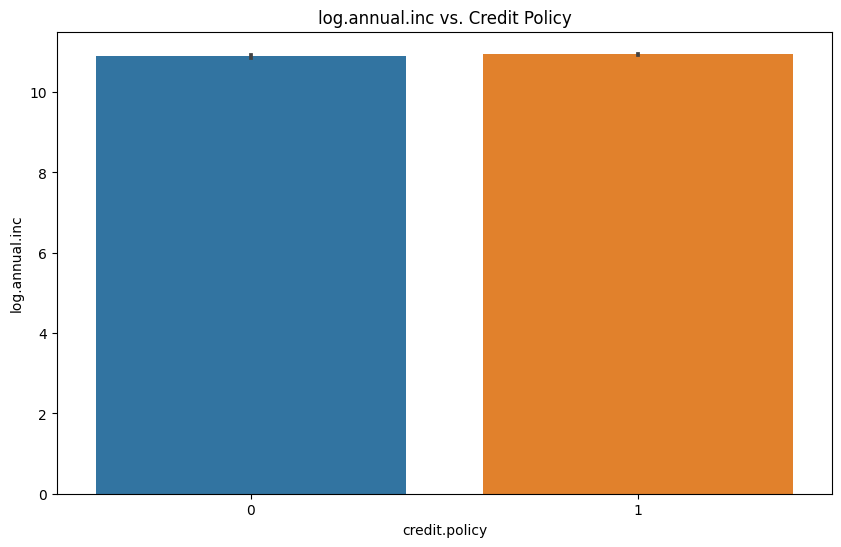

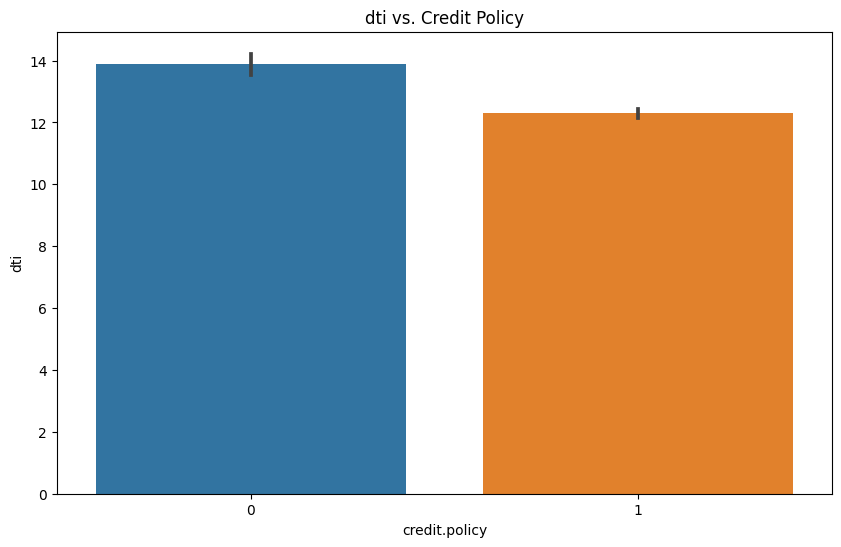

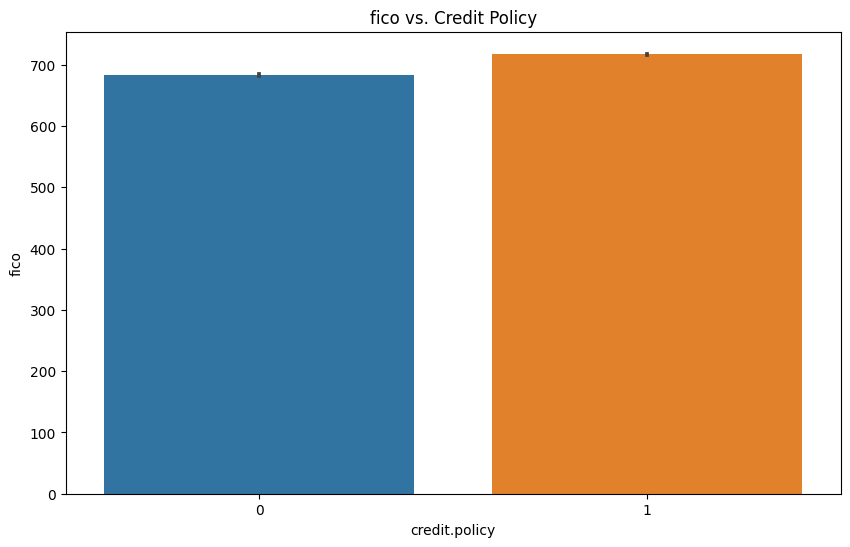

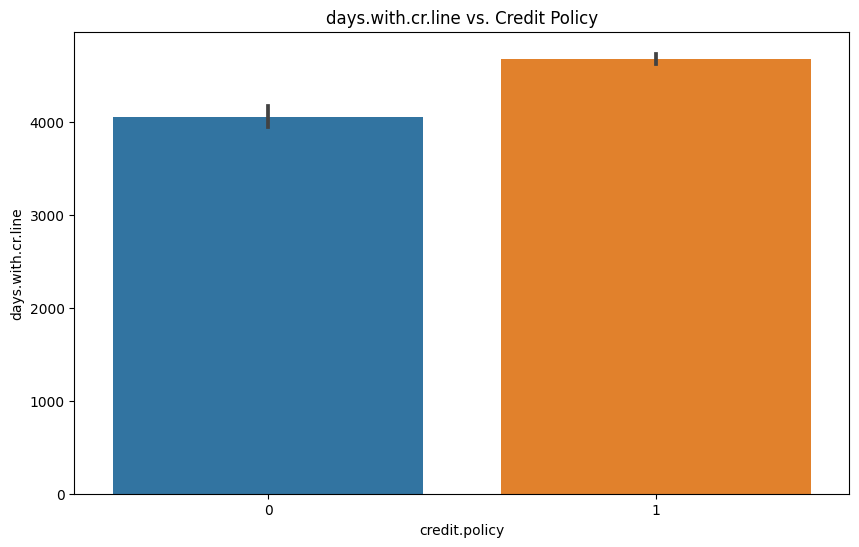

In [ ]:

sns.countplot(data=data, x='credit.policy')  # Count plot for target variable
plt.show()

# Feature vs. Target Visualization
features = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x='credit.policy', y=feature)
    plt.title(f'{feature} vs. Credit Policy')
    plt.show()




<ipython-input-35-47202c431e1d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


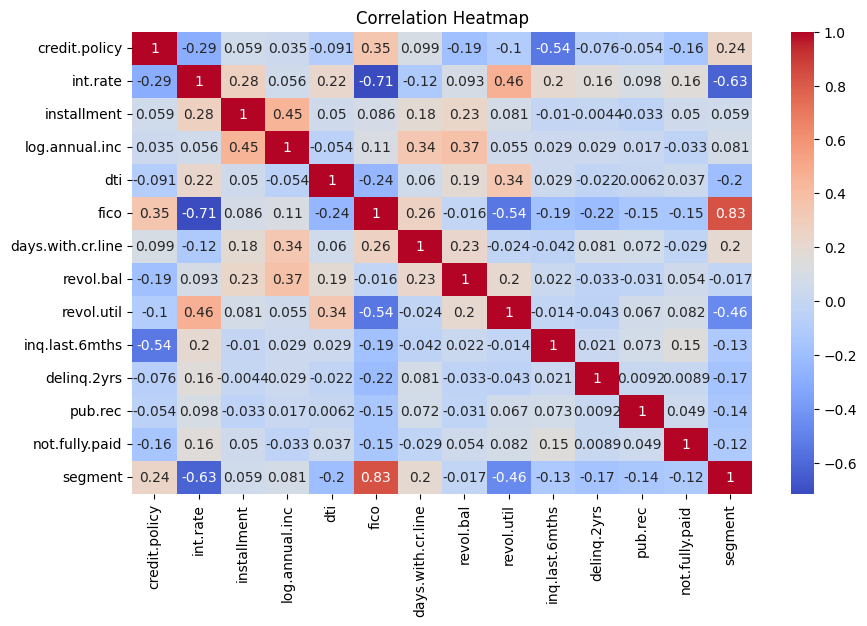

In [ ]:
# Correlation Analysis
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



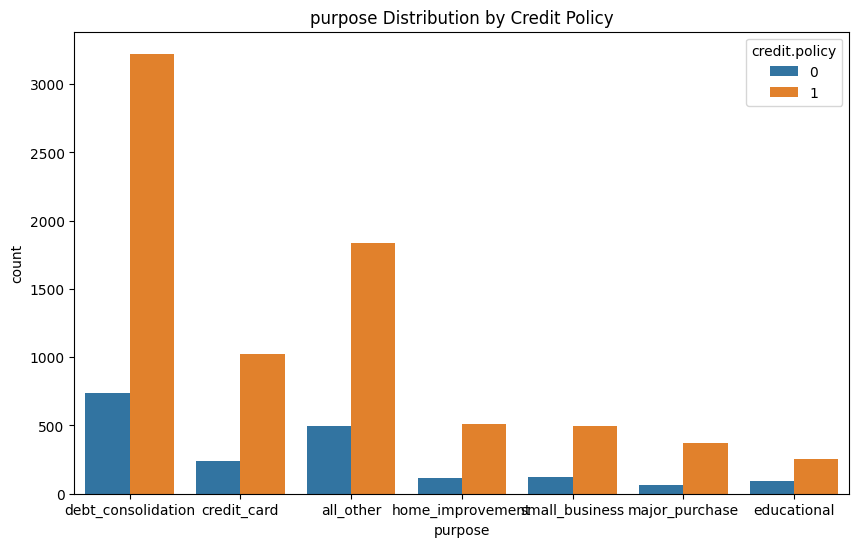

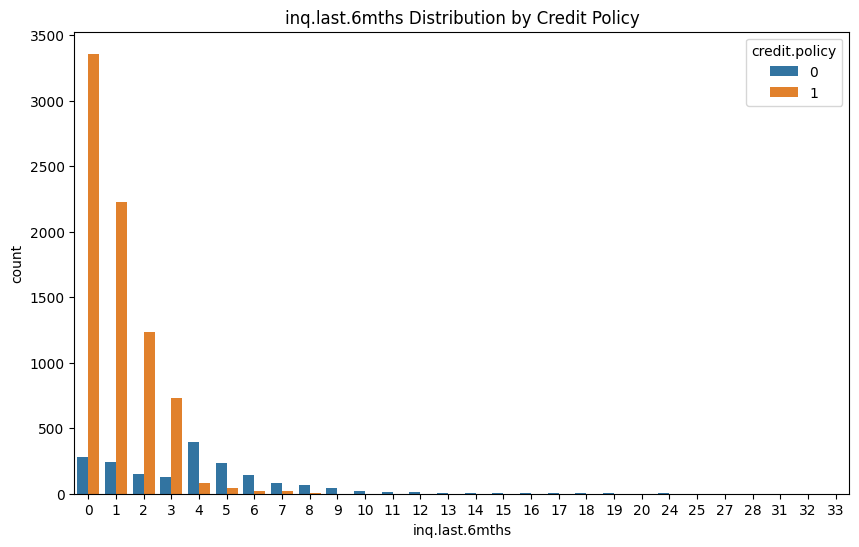

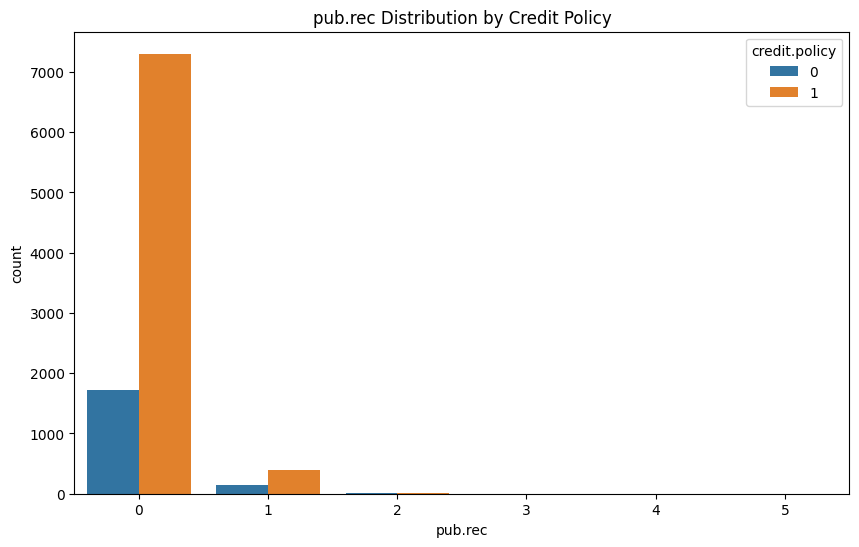

In [ ]:
# Categorical Features Impact
categorical_features = ['purpose', 'inq.last.6mths', 'pub.rec']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, hue='credit.policy')
    plt.title(f'{feature} Distribution by Credit Policy')
    plt.show()



The final visualizations shows the loan characteristics and their impact on creditworthiness individually .